# 线性判别分析（linear discriminant analysis, LDA）
- 在类别区分度高时，logistic回归模型参数不够稳定，这点在线性判别不存在
- 如果样本量n比较小，而且在每一类响应分类中预测变量X近似服从正态分布，那么线性判别比logistic回归更稳定
- 响应变量分类多于两类时，线性判别分析应用更普遍

## 运用贝叶斯定理进行分类
$K\geq2$，设$\pi_k$为一个随机选择的观测来自第k类的**先验**概率，$f_k(X)\equiv Pr(X=x|Y=k)$表示第k类观测的X的**密度函数**。则**贝叶斯定理**表述为：
$$p_k(X)=Pr(Y=k|X=x)=\frac{\pi_kf_k(x)}{\sum_{i=1}^K\pi_if_i(x)}\tag{4-1}$$
$p_k(X)$为$X=x$的观测属于第k类的后验概率。

## p=1的线性判别分析
分类器名称中的“线性”一词是由于判别函数中$\delta_k(x)$是x的线性函数。LDA分类器的结果是建立在每一类中的观测都来自于一个均值不同、方差相同（均为$\sigma^2$）的正态分布假设上的。将这些参数估计带入（4-1）贝叶斯分类器中得到LDA分类器。

## 二次判别分析（quadratic discriminant analysis, QDA）
QDA分类器也是假设每一类观测服从一个高斯分布，把参数估计带入贝叶斯分类器中，与LDA不同的是，QDA假设每一类观测都有自己的协方差矩阵。$\delta_k(x)$是x的二次函数。

LDA没有QDA分类器光滑，于是拥有更低的方差，该模型有改善预测效果的潜力。一般而言，如果训练观测数据相对较少，LDA比QDA更好，降低模型的方差很有必要。如果训练集很大，QDA更好，因为K类的协方差矩阵形同的假设很难成立。

## 分类方法比较
- LDA假设观测服从每一类协方差矩阵都相同的高斯分布，当其成立时，LDA比logistic能提供更好的结果，反之亦然。
- KNN是非参数方法，当决策边界高度非线性时，用该方法优于LDA和logistic，但无法得到系数估计。
- QDA是非参数KNN和线性LDA、logistic之间的一个折中方法。

# R操作

In [2]:
# loading packages
library("ISLR")
library("magrittr")
library("dplyr")
library("ggplot2")

## 股票市场数据
Direction为股票涨跌

In [3]:
glimpse(Smarket)

Observations: 1,250
Variables: 9
$ Year      <dbl> 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 200...
$ Lag1      <dbl> 0.381, 0.959, 1.032, -0.623, 0.614, 0.213, 1.392, -0.403,...
$ Lag2      <dbl> -0.192, 0.381, 0.959, 1.032, -0.623, 0.614, 0.213, 1.392,...
$ Lag3      <dbl> -2.624, -0.192, 0.381, 0.959, 1.032, -0.623, 0.614, 0.213...
$ Lag4      <dbl> -1.055, -2.624, -0.192, 0.381, 0.959, 1.032, -0.623, 0.61...
$ Lag5      <dbl> 5.010, -1.055, -2.624, -0.192, 0.381, 0.959, 1.032, -0.62...
$ Volume    <dbl> 1.1913, 1.2965, 1.4112, 1.2760, 1.2057, 1.3491, 1.4450, 1...
$ Today     <dbl> 0.959, 1.032, -0.623, 0.614, 0.213, 1.392, -0.403, 0.027,...
$ Direction <fctr> Up, Up, Down, Up, Up, Up, Down, Up, Up, Up, Down, Down, ...


### 拟合logistic回归模型

In [4]:
glm.logis <- Smarket %$% 
  glm(Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume, family = binomial)
summary(glm.logis)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.446  -1.203   1.065   1.145   1.326  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.126000   0.240736  -0.523    0.601
Lag1        -0.073074   0.050167  -1.457    0.145
Lag2        -0.042301   0.050086  -0.845    0.398
Lag3         0.011085   0.049939   0.222    0.824
Lag4         0.009359   0.049974   0.187    0.851
Lag5         0.010313   0.049511   0.208    0.835
Volume       0.135441   0.158360   0.855    0.392

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1731.2  on 1249  degrees of freedom
Residual deviance: 1727.6  on 1243  degrees of freedom
AIC: 1741.6

Number of Fisher Scoring iterations: 3


#### 模型拟合系数

In [6]:
# 拟合模型系数
summary(glm.logis)$coef

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-0.126000257,0.24073574,-0.5233966,0.6006983
Lag1,-0.073073746,0.05016739,-1.4565986,0.1452272
Lag2,-0.042301344,0.05008605,-0.8445733,0.3983491
Lag3,0.011085108,0.04993854,0.2219750,0.8243333
Lag4,0.009358938,0.04997413,0.1872757,0.8514445
Lag5,0.010313068,0.04951146,0.2082966,0.8349974
Volume,0.135440659,0.15835970,0.8552723,0.3924004


##### 预测概率

In [8]:
glm.probs <- predict(glm.logis, type = 'response') ## 预测训练数据集

##### 将预测概率转化为分类

In [9]:
glm.pred <- rep('Down', nrow(Smarket))
glm.pred[glm.probs > .5] <- 'Up'

##### 预测情况

In [10]:
# 预测和原始比较
table(glm.pred, Smarket$Direction)
# 训练集预测率
mean(glm.pred == Smarket$Direction)

        
glm.pred Down  Up
    Down  145 141
    Up    457 507

[1] 0.5216

在训练集的正确率尚如此，在测试集还会差一些

##### 将数据分为训练集和测试集，2005年之前为训练集

In [12]:
# 选择训练集和测试集
train <- Smarket$Year < 2005
Smarket.2005 <- Smarket[!train, ]
Smarket.train <- Smarket[train, ]
# 使用测试集拟合模型
glm.logis.train <- Smarket.train %$%
  glm(Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume, family = binomial)

##### 预测情况

In [14]:
# 预测测试集
glm.probs.test <- predict(glm.logis.train, Smarket.2005, type = 'response')
glm.pred.test <- rep('Down', nrow(Smarket.2005))
glm.pred.test[glm.probs.test > .5] <- 'Up'
table(glm.pred.test, Smarket.2005$Direction)
# 测试集预测率
mean(glm.pred.test == Smarket.2005$Direction)

             
glm.pred.test Down Up
         Down   77 97
         Up     34 44

[1] 0.4801587

###### 看吧，在测试集预测还不如我随便猜呢……

##### 选取p较小的两个变量进行预测

In [15]:
# 选取p值最小的两个变量进行预测
glm.logis.two.train <- Smarket.train %$%
  glm(Direction ~ Lag1 + Lag2, family = binomial)
# 预测测试集
glm.probs.two.test <- predict(glm.logis.two.train, Smarket.2005, type = 'response')
glm.pred.two.test <- rep('Down', nrow(Smarket.2005))
glm.pred.two.test[glm.probs.two.test > .5] <- 'Up'
# 预测率
mean(glm.pred.two.test == Smarket.2005$Direction)

[1] 0.5595238

###### 恩，预测正确率有所提升……

### LDA模型
所使用函数为`MASS`包中的`lda`。

In [17]:
# 载入函数
lda <- MASS::lda
# 拟合LDA
lda.fit <- Smarket %$% 
  lda(Direction ~ Lag1 + Lag2, subset = train)
lda.fit

Call:
lda(Direction ~ Lag1 + Lag2, subset = train)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

Coefficients of linear discriminants:
            LD1
Lag1 -0.6420190
Lag2 -0.5135293

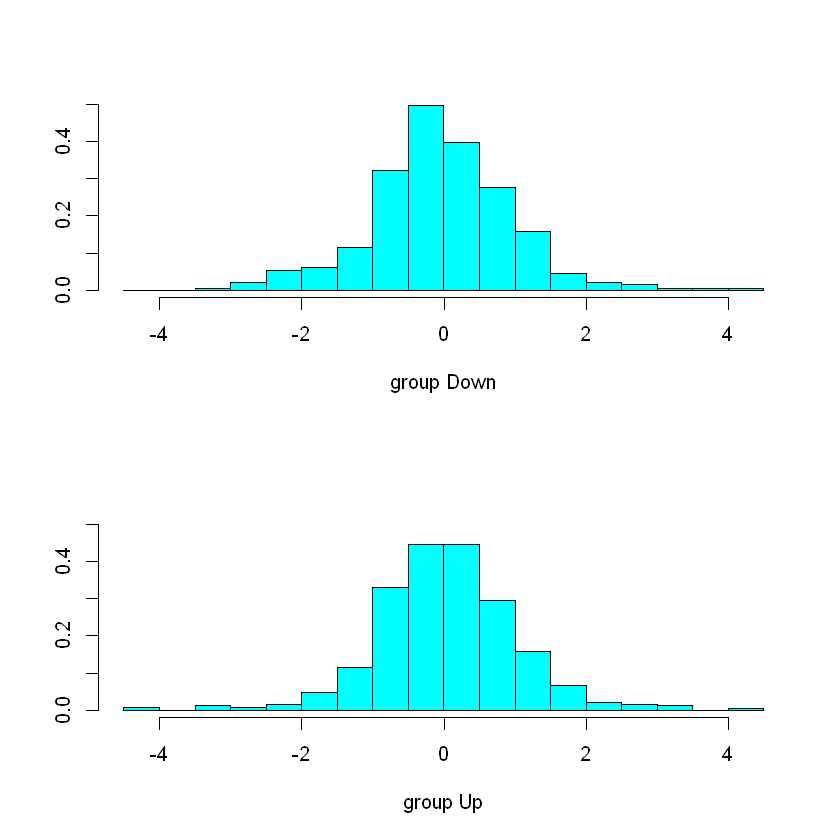

In [18]:
# 线性判别图像
plot(lda.fit)

###### 预测情况

In [19]:
lda.pred <- predict(lda.fit, Smarket.2005)
str(lda.pred)
# 测试集预测率
table(lda.pred$class, Smarket.2005$Direction)
mean(lda.pred$class == Smarket.2005$Direction)

List of 3
 $ class    : Factor w/ 2 levels "Down","Up": 2 2 2 2 2 2 2 2 2 2 ...
 $ posterior: num [1:252, 1:2] 0.49 0.479 0.467 0.474 0.493 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:252] "999" "1000" "1001" "1002" ...
  .. ..$ : chr [1:2] "Down" "Up"
 $ x        : num [1:252, 1] 0.0829 0.5911 1.1672 0.8334 -0.0379 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:252] "999" "1000" "1001" "1002" ...
  .. ..$ : chr "LD1"


      
       Down  Up
  Down   35  35
  Up     76 106

[1] 0.5595238

###### 看吧，和logistic一样的结果……

### QDA模型

In [20]:
# 载入函数
qda <- MASS::qda
qda.fit <- Smarket %$% 
  qda(Direction ~ Lag1 + Lag2, subset = train)
qda.fit

Call:
qda(Direction ~ Lag1 + Lag2, subset = train)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

###### 测试集预测概率

In [21]:
qda.pred <- predict(qda.fit, Smarket.2005)
str(qda.pred)

List of 2
 $ class    : Factor w/ 2 levels "Down","Up": 2 2 2 2 2 2 2 2 2 2 ...
 $ posterior: num [1:252, 1:2] 0.487 0.476 0.464 0.474 0.49 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:252] "999" "1000" "1001" "1002" ...
  .. ..$ : chr [1:2] "Down" "Up"


###### 预测情况

In [22]:
# 预测情况
table(qda.pred$class, Smarket.2005$Direction)
mean(qda.pred$class == Smarket.2005$Direction)

      
       Down  Up
  Down   30  20
  Up     81 121

[1] 0.5992063

###### 不错不错，比前两个都好……

### KNN模型
使用`class`包中的`knn`函数。需要输入四个参数。knn(train, test, cl, k = 1, l = 0, prob = FALSE, use.all = TRUE)

In [26]:
library("class")
train.x <- Smarket %$% cbind(Lag1, Lag2)[train, ]
test.x <- Smarket %$% cbind(Lag1, Lag2)[!train, ]
train.dir <- Smarket$Direction[train]

In [27]:
set.seed(1)
knn.pred <- knn(train.x, test.x, train.dir, k = 1)

###### 预测情况

In [28]:
# 预测情况
table(knn.pred, Smarket.2005$Direction)
mean(knn.pred == Smarket.2005$Direction)

        
knn.pred Down Up
    Down   43 58
    Up     68 83

[1] 0.5

在k=1时正确率刚好50%……我们再看看k=3

In [29]:
# k=3模型
knn.pred.3k <- knn(train.x, test.x, train.dir, k = 3)
# 预测情况
table(knn.pred.3k, Smarket.2005$Direction)
mean(knn.pred.3k == Smarket.2005$Direction)

           
knn.pred.3k Down Up
       Down   48 54
       Up     63 87

[1] 0.5357143

###### 不错，53%了……

### 大篷车保险数据KNN

In [30]:
dim(Caravan)
names(Caravan)
table(Caravan$Purchase)

[1] 5822   86

[1] "MOSTYPE"  "MAANTHUI" "MGEMOMV"  "MGEMLEEF" "MOSHOOFD" "MGODRK"  
 [7] "MGODPR"   "MGODOV"   "MGODGE"   "MRELGE"   "MRELSA"   "MRELOV"  
[13] "MFALLEEN" "MFGEKIND" "MFWEKIND" "MOPLHOOG" "MOPLMIDD" "MOPLLAAG"
[19] "MBERHOOG" "MBERZELF" "MBERBOER" "MBERMIDD" "MBERARBG" "MBERARBO"
[25] "MSKA"     "MSKB1"    "MSKB2"    "MSKC"     "MSKD"     "MHHUUR"  
[31] "MHKOOP"   "MAUT1"    "MAUT2"    "MAUT0"    "MZFONDS"  "MZPART"  
[37] "MINKM30"  "MINK3045" "MINK4575" "MINK7512" "MINK123M" "MINKGEM" 
[43] "MKOOPKLA" "PWAPART"  "PWABEDR"  "PWALAND"  "PPERSAUT" "PBESAUT" 
[49] "PMOTSCO"  "PVRAAUT"  "PAANHANG" "PTRACTOR" "PWERKT"   "PBROM"   
[55] "PLEVEN"   "PPERSONG" "PGEZONG"  "PWAOREG"  "PBRAND"   "PZEILPL" 
[61] "PPLEZIER" "PFIETS"   "PINBOED"  "PBYSTAND" "AWAPART"  "AWABEDR" 
[67] "AWALAND"  "APERSAUT" "ABESAUT"  "AMOTSCO"  "AVRAAUT"  "AAANHANG"
[73] "ATRACTOR" "AWERKT"   "ABROM"    "ALEVEN"   "APERSONG" "AGEZONG" 
[79] "AWAOREG"  "ABRAND"   "AZEILPL"  "APLEZIER" "AFIETS"   "AINBOED" 
[85] "ABYSTAND" "Purchase"


  No  Yes 
5474  348 

###### 数据有5822条，86个变量，其中买保险的有348个。我们先标化数据：

In [31]:
# 标化数据
Caravan.std <- scale(Caravan[, -86])
data.class(Caravan.std)

[1] "matrix"

In [32]:
# 前1000个为测试集
test <- 1 : 1000
train.x <- Caravan.std[-test, ]
test.x <- Caravan.std[test, ]
train.y <- Caravan$Purchase[-test]
test.y <- Caravan$Purchase[test]

In [33]:
set.seed(1)
knn.pred.car <- knn(train.x, test.x, train.y, k = 1)
# 预测情况
# 准确率
mean(test.y == knn.pred.car)
mean(knn.pred.car == 'Yes')
table(knn.pred.car, test.y) ## 预测了9/77购买

[1] 0.882

[1] 0.077

            test.y
knn.pred.car  No Yes
         No  873  50
         Yes  68   9

###### 看着好像不错的样子，其实不然，因为

In [37]:
9 / 77
# 购买占比例
mean(test.y == 'Yes')

[1] 0.1168831

[1] 0.059

###### 当k=3时

In [35]:
## 当k = 3
knn.pred.car <- knn(train.x, test.x, train.y, k = 3)
# 预测情况
# 准确率
mean(test.y == knn.pred.car)
mean(knn.pred.car == 'Yes')
table(knn.pred.car, test.y) ## 预测了5/26购买

[1] 0.925

[1] 0.026

            test.y
knn.pred.car  No Yes
         No  920  54
         Yes  21   5

In [38]:
5 / 26

[1] 0.1923077

###### 预测了19%的购买

###### 当k=5时

In [39]:
## 当k = 5
knn.pred.car <- knn(train.x, test.x, train.y, k = 5)
# 预测情况
# 准确率
mean(test.y == knn.pred.car)
mean(knn.pred.car == 'Yes')
table(knn.pred.car, test.y) ## 预测了4/15购买

[1] 0.934

[1] 0.015

            test.y
knn.pred.car  No Yes
         No  930  55
         Yes  11   4

In [40]:
4 / 15

[1] 0.2666667

###### 预测了26.6%

### 大篷车logistic模型

In [42]:
glm.fit.car <- glm(Purchase ~ .,data = Caravan, family =binomial, subset = -test)
glm.fit.car.probs <- predict(glm.fit.car, Caravan[test, ], type = 'response')
glm.pred.car <- rep('No', 1000)
glm.pred.car[glm.fit.car.probs > .5] <- 'Yes'
table(glm.pred.car, test.y)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

            test.y
glm.pred.car  No Yes
         No  934  59
         Yes   7   0

###### 预测了7个购买，还都预测错了，sad……我们把概率阈值下调到0.25看看

In [43]:
# 阈值改为.25
glm.pred.car[glm.fit.car.probs > .25] <- 'Yes'
# 预测情况
table(glm.pred.car, test.y) ## 11/33

            test.y
glm.pred.car  No Yes
         No  919  48
         Yes  22  11

In [44]:
11 / 33

[1] 0.3333333

###### 不错不错……

好吧，这章还没学透，回头再回来继续学,习题也很多，挑几道改天做吧……要去学点别的东东了……